In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [12]:
from sklearn import (
    linear_model, metrics, neural_network, pipeline,
    model_selection, tree
)

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score


ImportError: cannot import name 'model_selection'

In [11]:
!pip install seaborn 
!pip install sklearn 
#!pip install seaborn 

#!pip install sklearn.ensemble
#!pip install sklearn.model_selection

#sns.set()

You are using pip version 8.1.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 8.1.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
judges = pd.read_csv("Judge Attribute and Ideology.csv")
#judges.head()

print(mean(judges["Previous Position - private"]))

,Name,Circuit,ID,Appointing President,Year of Departure,Year of Birth,Year of Death,President when Departed,Reason for Departing,Judge Party,...,Previous Position - ccoun,Previous Position - ccom,Previous Position - ada,Previous Position - da,Previous Position - lother,Previous Position - lotherl,Previous Position - lawprof,Previous Position - private,Ideology Score_x,Ideology Score_y
0,"Abruzzo, Matthew J.",2,2,F. Roosevelt,1966,1889.0,1971.0,L.B. Johnson,Retired,Democrat,...,0,0,0,0,0,0,0,1,NaN,NaN
1,"Acheson, Marcus Wilson",3,4,Hayes,1891,1828.0,1906.0,B. Harrison,Elevated,Republican,...,0,0,0,0,0,0,0,1,NaN,NaN
2,"Acker, William Marsh, Jr.",11,10,Reagan,1996,1927.0,9999.0,Clinton,Retired,Republican,...,0,0,0,0,0,0,0,1,0.407,0.407
3,"Ackerman, Harold Arnold",3,15,Carter,1994,1928.0,9999.0,Clinton,Retired,Democrat,...,0,0,0,0,0,0,0,1,-0.306,-0.306
4,"Ackerman, James Waldo",7,20,Ford,1984,1926.0,1984.0,Reagan,Died,Republican,...,0,0,0,0,1,1,0,1,0.061,0.061


In [7]:
list(judges)

['Name',
 'Circuit',
 'ID',
 'Appointing President',
 'Year of Departure',
 'Year of Birth',
 'Year of Death',
 'President when Departed',
 'Reason for Departing',
 'Judge Party',
 'District',
 'State',
 'City',
 'Gender',
 'Race',
 'Year of Appointment',
 'Cross Appointment',
 'Recess Appointment',
 'Assets',
 'ABA Rating',
 'Congress',
 'Unity',
 'House Democrats',
 'House Republicans',
 'Senate Democrats',
 'Senate Republicans',
 'House Independents',
 'Senate Independents',
 'Net Worth',
 'Previous Position - ssc',
 'Previous Position - slc',
 'Previous Position - locct',
 'Previous Position - sjdget',
 'Previous Position - ausa',
 'Previous Position - usa',
 'Previous Position - sgo',
 'Previous Position - sg',
 'Previous Position - ago',
 'Previous Position - ag',
 'Previous Position - cc',
 'Previous Position - sp',
 'Previous Position - mag',
 'Previous Position - bank',
 'Previous Position - terr',
 'Previous Position - cab',
 'Previous Position - asatty',
 'Previous Position 

In [22]:
judges["abs_ideo"].describe()

count    1904.000000
mean        0.277145
std         0.150386
min         0.000000
25%         0.166000
50%         0.284000
75%         0.378000
max         0.680000
Name: abs_ideo, dtype: float64

In [21]:
judges["abs_ideo"] = abs(judges["Ideology Score_x"])


In [74]:
abs_ideo_year = judges.groupby("Year of Appointment")["abs_ideo"].mean()
abs_ideo_year = abs_ideo_year.to_frame()

abs_ideo_year.reset_index(inplace = True)

ideo_year = judges.groupby(["Year of Appointment","Judge Party"])["Ideology Score_x"].mean()
ideo_year = ideo_year.to_frame()

ideo_year.reset_index(inplace = True)

ideo_age = judges.groupby(["Year of Birth","Judge Party"])[["Ideology Score_x","abs_ideo"]].mean()
#ideo_age = ideo_age.to_frame()

ideo_age.reset_index(inplace = True)


In [75]:
ideo_age.tail()

,Year of Birth,Judge Party,Ideology Score_x,abs_ideo
419,1961.0,Republican,0.391750,0.391750
420,1962.0,Republican,0.333333,0.333333
421,1964.0,Republican,0.486000,0.486000
422,1965.0,Republican,0.141000,0.141000
423,1966.0,Republican,0.182000,0.182000


In [42]:
#initial_year = 1950
#recent_years = abs_ideo_year["Year of Appointment"] > initial_year
#abs_ideo_year = abs_ideo_year[recent_years]



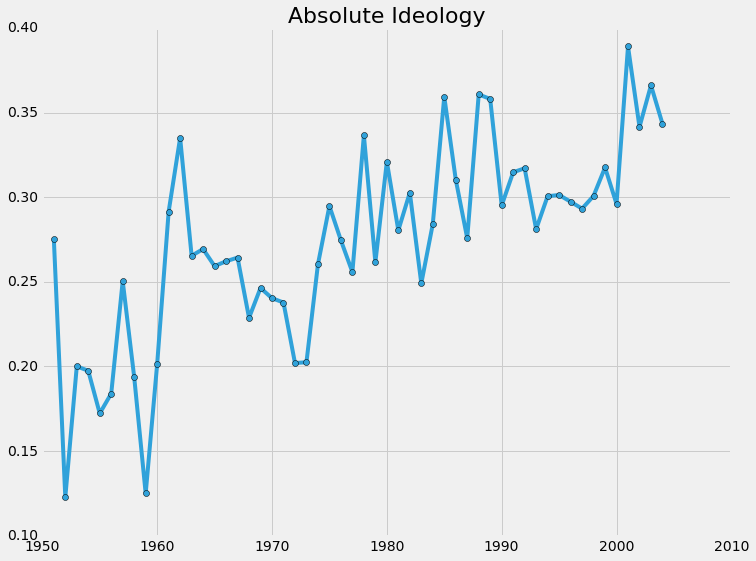

In [41]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(11,8.5))

recent_years = abs_ideo_year["Year of Appointment"] > 1950

ax.plot(abs_ideo_year[recent_years]["Year of Appointment"],
        abs_ideo_year[recent_years]["abs_ideo"],"-o")

ax.set_title("Absolute Ideology",fontsize=22)
#fig.tight_layout()

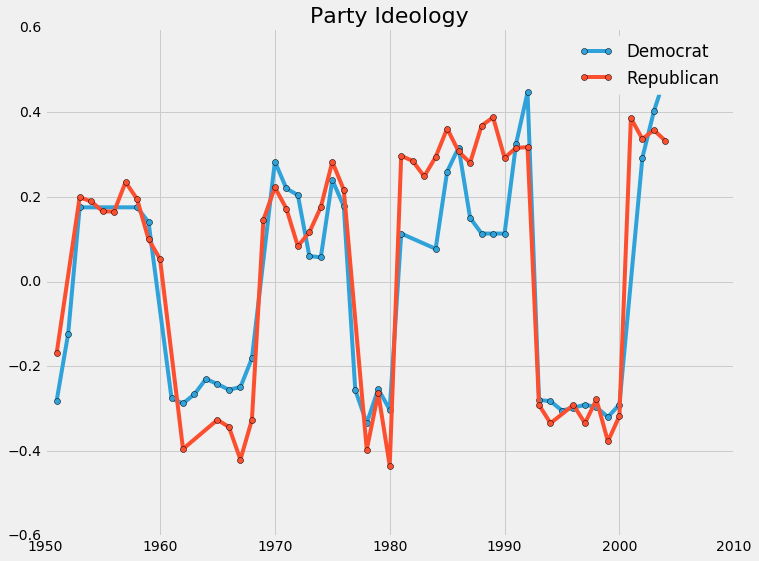

In [56]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(11,8.5))

#recent_years = abs_ideo_year["Year of Appointment"] > 1950


ax.plot(ideo_year[(ideo_year["Year of Appointment"] > 1950) & 
                 (ideo_year["Judge Party"] == "Democrat")]["Year of Appointment"],
        ideo_year[(ideo_year["Year of Appointment"] > 1950) & 
                 (ideo_year["Judge Party"] == "Democrat")]["Ideology Score_x"],"-o",label="Democrat")




ax.plot(ideo_year[(ideo_year["Year of Appointment"] > 1950) & 
                 (ideo_year["Judge Party"] == "Republican")]["Year of Appointment"],
        ideo_year[(ideo_year["Year of Appointment"] > 1950) & 
                 (ideo_year["Judge Party"] == "Republican")]["Ideology Score_x"],"-o",label="Republican")

ax.legend()
ax.set_title("Party Ideology",fontsize=22)
#fig.tight_layout()

In [48]:
abs_ideo_gender_year = judges.groupby(["Year of Appointment","Gender"])["abs_ideo"].mean()
abs_ideo_gender_year = abs_ideo_gender_year.to_frame()

abs_ideo_gender_year.reset_index(inplace = True)

In [50]:
abs_ideo_gender_year.tail()

,Year of Appointment,Gender,abs_ideo
234,2002,Male,0.344500
235,2003,Female,0.401000
236,2003,Male,0.359217
237,2004,Female,0.371444
238,2004,Male,0.331286


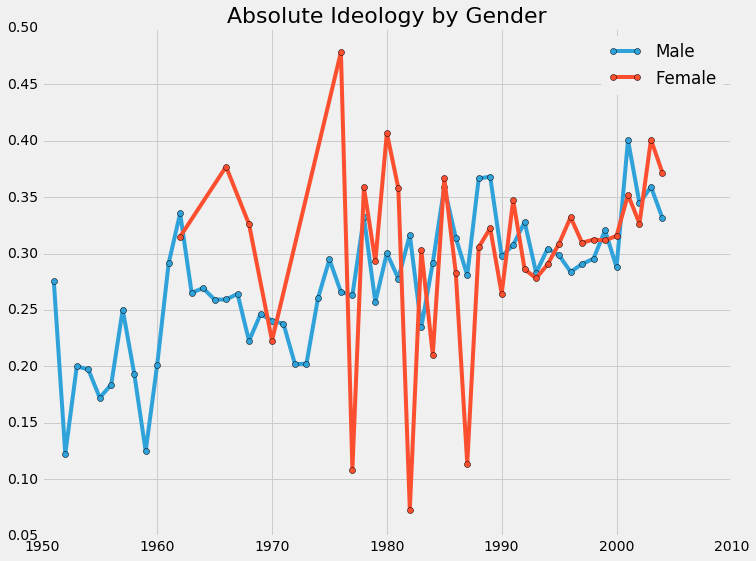

In [60]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(11,8.5))

initial_year = 1950
#recent_years = abs_ideo_year["Year of Appointment"] > 1950

ax.plot(abs_ideo_gender_year[(abs_ideo_gender_year["Year of Appointment"] > initial_year) &
                            (abs_ideo_gender_year["Gender"] == "Male")]["Year of Appointment"],
        abs_ideo_gender_year[(abs_ideo_gender_year["Year of Appointment"] > initial_year) &
                            (abs_ideo_gender_year["Gender"] == "Male")]["abs_ideo"],"-o",label="Male")


ax.plot(abs_ideo_gender_year[(abs_ideo_gender_year["Year of Appointment"] > initial_year) &
                            (abs_ideo_gender_year["Gender"] == "Female")]["Year of Appointment"],
        abs_ideo_gender_year[(abs_ideo_gender_year["Year of Appointment"] > initial_year) &
                            (abs_ideo_gender_year["Gender"] == "Female")]["abs_ideo"],"-o",label="Female")

ax.legend()
ax.set_title("Absolute Ideology by Gender",fontsize=22)
#fig.tight_layout()

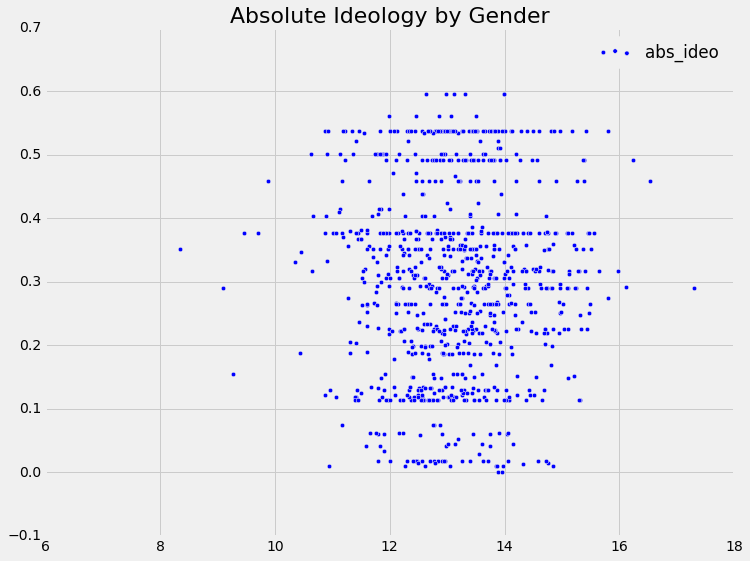

In [65]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(11,8.5))

#initial_year = 1950
#recent_years = abs_ideo_year["Year of Appointment"] > 1950

judges["Log Net Worth"] = np.log(judges["Net Worth"])

ax.scatter(judges[(judges["Year of Appointment"] > initial_year)]["Log Net Worth"],
        judges[(judges["Year of Appointment"] > initial_year)]["abs_ideo"])




#ax.plot(abs_ideo_gender_year[(abs_ideo_gender_year["Year of Appointment"] > initial_year) &
#                            (abs_ideo_gender_year["Gender"] == "Female")]["Year of Appointment"],
#        abs_ideo_gender_year[(abs_ideo_gender_year["Year of Appointment"] > initial_year) &
#                            (abs_ideo_gender_year["Gender"] == "Female")]["abs_ideo"],"-o",label="Female")

ax.legend()
ax.set_title("Absolute Ideology and Net Worth",fontsize=22)
#fig.tight_layout()

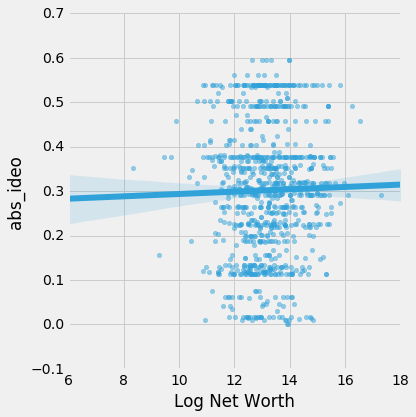

In [70]:
import seaborn as sns


sns.lmplot(
    data=judges, x="Log Net Worth", y="abs_ideo", height=6,
    scatter_kws=dict(s=20, alpha=0.5)
    )


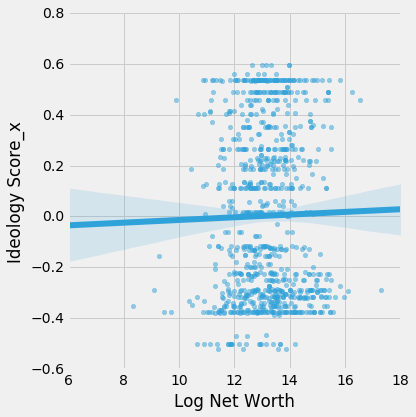

In [71]:
sns.lmplot(
    data=judges, x="Log Net Worth", y="Ideology Score_x", height=6,
    scatter_kws=dict(s=20, alpha=0.5)
    )
